In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydataset import data

In [2]:
# Aquire Telco Data combining all tables
#info(), .describe(), .value_counts(),
import get_function_telco as gft
df = gft.get_telco()
df.head()

,customer_id,gender,is_male,senior_citizen,partner,dependents,family,partner_deps_id,partner_deps,tenure,...,contract_type,on_contract,contract_duration,paperless_billing,payment_type_id,payment_type,auto_pay,monthly_charges,total_charges,churn
0,0003-MKNFE,Male,1,0,0,0,0,0,"No partner, no dependents",9,...,Month-to-month,1,1,0,2,Mailed check,0,59.9,542.40,0
1,0004-TLHLJ,Male,1,0,0,0,0,0,"No partner, no dependents",4,...,Month-to-month,1,1,1,1,Electronic check,0,73.9,280.85,1
2,0011-IGKFF,Male,1,1,1,0,1,2,"Has partner, no dependents",13,...,Month-to-month,1,1,1,1,Electronic check,0,98.0,1237.85,1
3,0013-EXCHZ,Female,0,1,1,0,1,2,"Has partner, no dependents",3,...,Month-to-month,1,1,1,2,Mailed check,0,83.9,267.40,1
4,0013-MHZWF,Female,0,0,0,1,1,1,"No partner, has dependents",9,...,Month-to-month,1,1,1,4,Credit card (automatic),1,69.4,571.45,0


In [25]:
train.contract_type.value_counts()

AttributeError: 'DataFrame' object has no attribute 'contract_type'

In [3]:
#sumerizing data

In [4]:
df.shape

(7043, 36)

In [5]:
df.describe()

,is_male,senior_citizen,partner,dependents,family,partner_deps_id,tenure,phone_service,multiple_lines,phone_service_id,...,streaming_services,contract_type_id,on_contract,contract_duration,paperless_billing,payment_type_id,auto_pay,monthly_charges,total_charges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.534289,1.265654,32.371149,0.903166,0.421837,1.325004,...,0.496805,1.690473,0.550192,8.835865,0.592219,2.315633,0.435326,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,0.498858,1.274126,24.559481,0.295752,0.493888,0.642730,...,0.500025,0.833755,0.497510,9.551444,0.491457,1.148907,0.495835,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,29.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,55.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,1.000000,12.000000,1.000000,3.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,72.000000,1.000000,1.000000,2.000000,...,1.000000,3.000000,1.000000,24.000000,1.000000,4.000000,1.000000,118.750000,8684.800000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
customer_id               7043 non-null object
gender                    7043 non-null object
is_male                   7043 non-null int64
senior_citizen            7043 non-null int64
partner                   7043 non-null int64
dependents                7043 non-null int64
family                    7043 non-null int64
partner_deps_id           7043 non-null int64
partner_deps              7043 non-null object
tenure                    7043 non-null int64
phone_service             7043 non-null int64
multiple_lines            7043 non-null int64
phone_service_id          7043 non-null int64
phone_service_type        7043 non-null object
internet_service          7043 non-null int64
has_dsl                   7043 non-null int64
has_fiber                 7043 non-null int64
online_security           7043 non-null int64
online_backup             7043 non-null int64
online_security

In [7]:
#dropping columns with redundant values
df = df.drop(columns=["contract_type","payment_type",'phone_service_type','gender'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customer_id               7043 non-null object
is_male                   7043 non-null int64
senior_citizen            7043 non-null int64
partner                   7043 non-null int64
dependents                7043 non-null int64
family                    7043 non-null int64
partner_deps_id           7043 non-null int64
partner_deps              7043 non-null object
tenure                    7043 non-null int64
phone_service             7043 non-null int64
multiple_lines            7043 non-null int64
phone_service_id          7043 non-null int64
internet_service          7043 non-null int64
has_dsl                   7043 non-null int64
has_fiber                 7043 non-null int64
online_security           7043 non-null int64
online_backup             7043 non-null int64
online_security_backup    7043 non-null int64
device_protection         7043 non-null int64
tech_support     

In [9]:
#split data into test and train
train, test = train_test_split(df, train_size = .8, random_state = 999)


In [10]:
X_train = train.drop(columns=['churn','customer_id','partner_deps'])
y_train = train.churn

In [11]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_train)
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [12]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=123)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_train)
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [13]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=123)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_train)
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 0.90


In [14]:
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_train)
    y_pred_proba=clf.predict_proba(X_train)
    y_pred_proba

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
    
    x += 1

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on training set: 0.81
Accuracy of Decision Tree classifier on training set: 0.82
Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on training set: 0.86
Accuracy of Decision Tree classifier on training set: 0.88
Accuracy of Decision Tree classifier on training set: 0.90
Accuracy of Decision Tree classifier on training set: 0.92
Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on training set: 0.

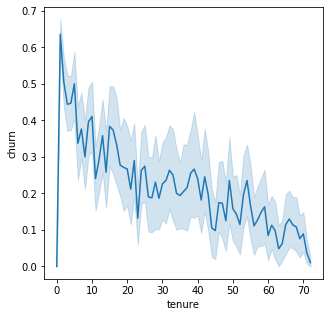

In [15]:
plt.figure(figsize=(5, 5))
sns.lineplot(train.tenure,train.churn)

In [16]:
#add new feature tenure in years
train['tenure_in_years'] = train.tenure / 12

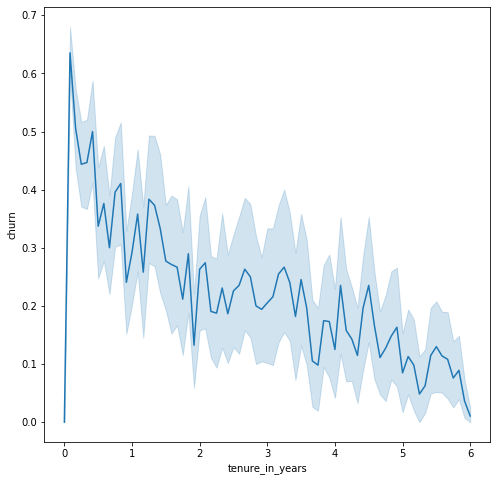

In [17]:
plt.figure(figsize=(8, 8))
sns.lineplot(train.tenure_in_years,train.churn,dashes=True)

In [18]:
# Data shows a gradual downword trend.
# Data seems to be prone to rapid peeks and valleys.
# Rapidity of peeks and vallys seem to suggest that there is not a tenure group that is more prone to churn.
# Sharpist decline is right before the two year mark and could be worth investigating 

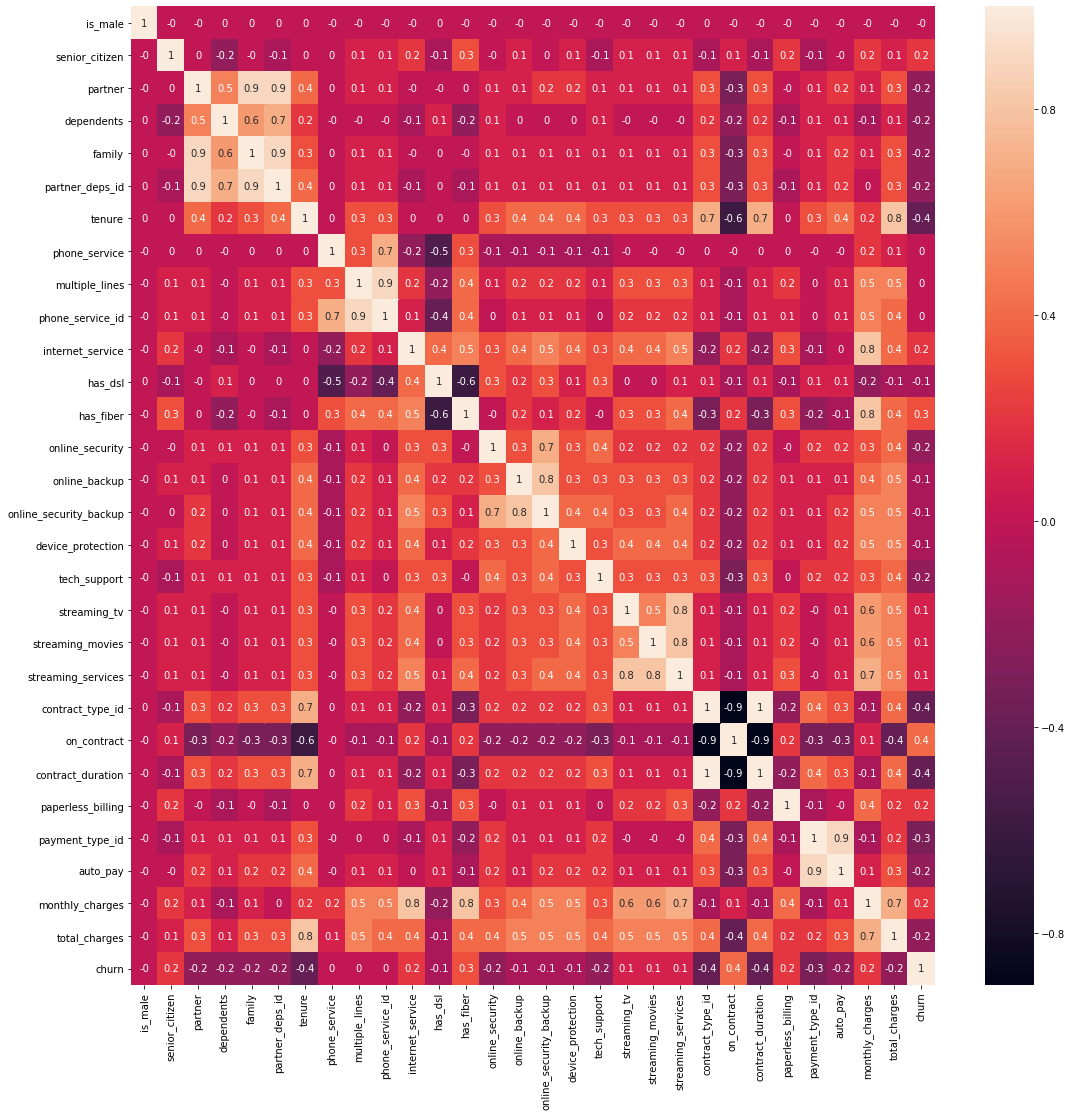

In [19]:
# heat map of data

plt.figure(figsize=(18, 18))
sns.heatmap(round(df.corr(),1),annot=True)

In [20]:
# Nerrowing features to those have at least a .3 correlation with churn.
# Remaining veriables are: tenure, has_fiber, contract_type_id, on_contract, contract_duration, payment_type_id
# removing contract_type_id, on_contract, and contract_duration all convay similer information removing all
# except contract duration
# remaining features are tenure, has_fiber, and contract_duration

In [21]:
# 4 find churn rate for m-m cust after 12m find yearly after 12 months



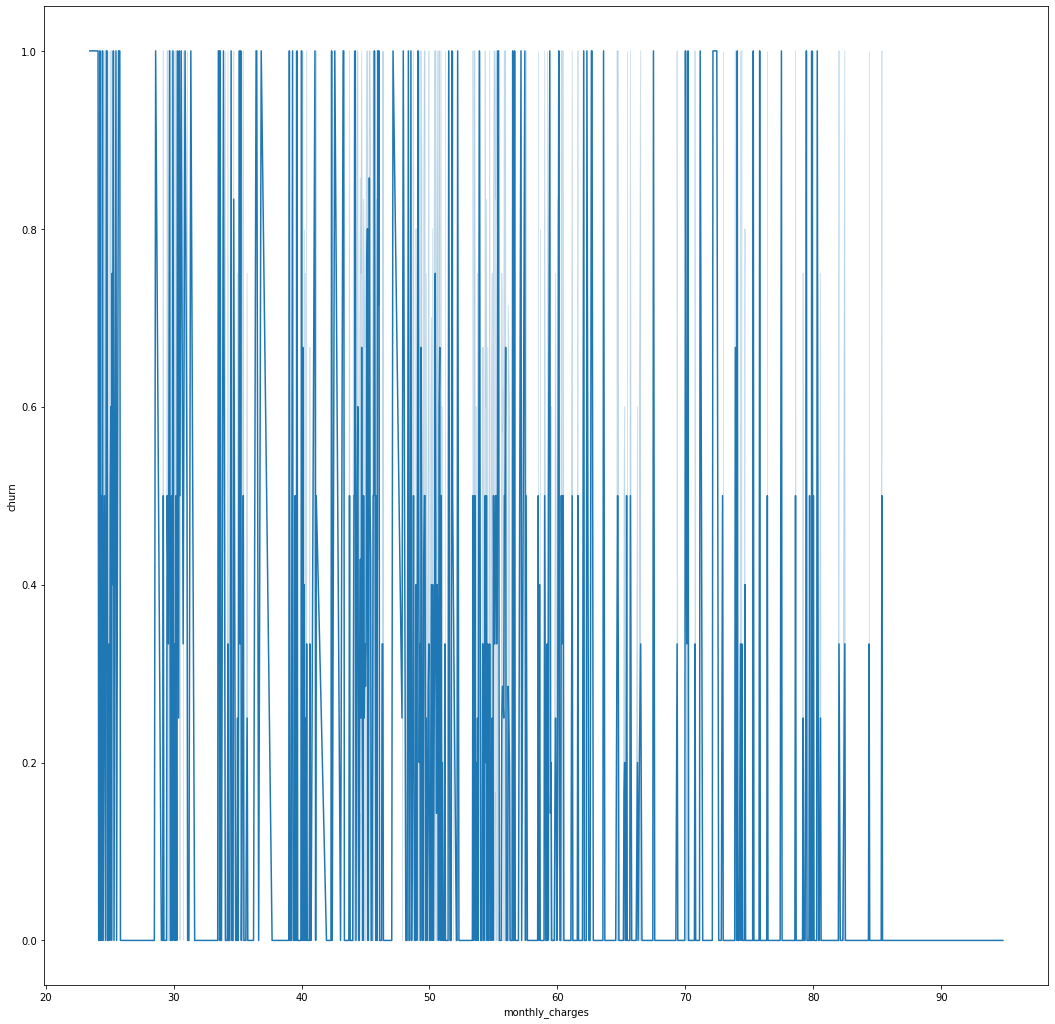

In [27]:
# 1 finished
# 2 fiber and contract type
# 3 plot graph for each service with monthlycharge and churn
# 4 find churn rate for m-m cust after 12m find yearly after 12 months
# 5 find mean monthly charge of each id type and compare for churned and nonchurned
# 6 correlation test monthly charges and internet service type
# 7 
# 8 heatmap
# 9 Correlated to churn predict reasons
# 10 summerize conclutions answer questions 
# provide clear take aways/ action plan


plt.figure(figsize=(18, 18))
sns.lineplot(train[train.has_dsl==1].monthly_charges,train.churn)
                   
                   

#t[t.column==value].monthlycharges

In [ ]:
#5 use mean of each group in a 2 sample t-test 

In [ ]:
# Running new treechart to test new features

X_train = train[['tenure','has_fiber','contract_duration']]
y_train = train.churn

In [ ]:
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_train)
    y_pred_proba=clf.predict_proba(X_train)
    y_pred_proba

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
    
    x += 1

In [ ]:
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='gini',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_train)
    y_pred_proba=clf.predict_proba(X_train)
    y_pred_proba

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
    
    x += 1

In [ ]:
X_train = train[['tenure','has_fiber','contract_duration']]
y_train = train.churn

X_test = test[['tenure','has_fiber','contract_duration']]
y_test = test.churn

In [ ]:
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    y_pred_proba=clf.predict_proba(X_test)
    y_pred_proba

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_test,y_test)))
    
    x += 1

In [ ]:
monthly_charges by churn for each 

In [ ]:
# heat map of data

plt.figure(figsize=(18, 18))
sns.heatmap(round(df.corr(),1),annot=True)

In [ ]:
#add new feature tenure in years
train['tenure_in_years'] = train.tenure / 12

In [ ]:
#add new feature combining phone service and multiple lines
# 0 has no phone lines 
# 1 has one phone line 
# 2 has multiple phone lines
train['phone_lines'] = train.multiple_lines.apply(lambda n: 2 if n == 'Yes' else 1 if n == 'No' else 0)

In [ ]:
# add new feature has family combining dependants and partner
# 0 has no family
# 1 has spouse
# 2 has dependant
# 3 has spouse and dependant
# train['has_family'] = 1
#train['has_family'] = (lambda n: 3 if (train.dependents == "Yes") & (train.partner == "Yes") else 2 if (train.dependents == "Yes") & (train.partner == "No") else 1 if (train.dependents == "No") & (train.partner == "Yes") else 0 if (train.dependents == "No") & (train.partner == "No"))